# **Eye Detection Model**

**This Notebook is Designed By [Mabtoor Ul Shafiq](https://pk.linkedin.com/in/mabtoormabx)**

In this Notebook, we have to detect the eye shades and Eye Classification using tranfer learning (Pre-trained Model). For This Purpose, We have to used different pre-trained models


**We have Done This Project under the Supervision of Sir Asif Iqbal at AI Soft Faisalabad and Sir Aftab at Cybex It Faisalabad**


During 3 Months in Cybex It faisalabad and AI Soft Faisalabad , We Learn Transfer learning and How to use Transfer Learning Pre-Trained Models for Classification and Detection.



Our Project is to Detect classification of eyes. For This Purpose, We used 5 Different Pre-Trained Models. These are as Follows:


1. EfficientNetV2B0
      * 88% accuracy & 99% val-accuracy in feature extraction
      * 95% accuracy & 99% val-accuracy in fine-Tuning
2. Inception V3
      * 92% accuracy & 98% val-accuracy in feature extraction
      * 96% accuracy & 98% val-accuracy in fine-Tuning
3. NASNET Mobile
      * 83% accuracy & 95% val-accuracy in feature extraction
      * 86% accuracy & 94% val-accuracy in fine-Tuning
4. ResNet50
      * 96% accuracy & 98% val-accuracy in feature extraction
      * 99% accuracy & 100% val-accuracy in fine-Tuning
5. MobileNet
      * 83% accuracy & 95% val-accuracy in feature extraction
      * 91% accuracy & 99% val-accuracy in fine-Tuning



The Dataset We using: https://www.kaggle.com/datasets/kayvanshah/eye-dataset


#**Referrences**

**[Mabtoor Ul Shafiq](https://pk.linkedin.com/in/mabtoormabx) Deep Learning Practitioner, Content Writer** 

**[Cybex It Group]( https://cybex.com.pk) Faisalabad, Pakistan**

**[Asif Iqbal ](https://www.linkedin.com/in/asif-iqbal-0a557983/) CEO AI-Soft**

**[Aftab Ur Rehman](https://www.linkedin.com/in/muhammad-aftab-ur-rehman-145b6a74/) CEO Cybex IT**

**[AI-Soft](http://www.ai-softwares.solutions/) Faisalabad ,Pakistan**



## **1-Import Helper Function**

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-01 13:41:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-01 13:41:19 (68.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## **2- Import useful function using helper.py file**

In [2]:
# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

## **3- Mount Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **4- Install Split Folders**

In [4]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import splitfolders

## **5- Load Dataset from Google drive**

In [6]:
import zipfile

# unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Eye_dataset(close_look, forward_look, left_look,right_look.zip")
zip_ref.extractall()
zip_ref.close()

## **6- List all Dataset**

In [7]:
# get the class names prgrammatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/Eye dataset")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class_names from the subdirectories
print(class_names)

['close_look' 'forward_look' 'left_look' 'right_look']


## **7-  Visualizing The images**

In [8]:
# let's visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) # this line means randomly sample one item form the target folder
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show thw shape of the image

  return img 


## **8-Showing One Random Image**

['right_(765).jpg']
Image shape: (63, 63)


array([[107, 107, 107, ...,  63,  61,  59],
       [108, 108, 108, ...,  63,  61,  60],
       [109, 109, 109, ...,  63,  60,  59],
       ...,
       [ 91,  88,  85, ...,  81,  79,  78],
       [ 93,  90,  87, ...,  81,  80,  79],
       [ 94,  91,  88, ...,  81,  80,  80]], dtype=uint8)

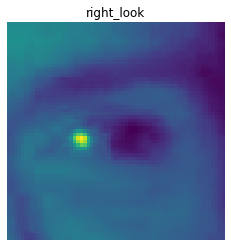

In [9]:
view_random_image(target_dir="/content/Eye dataset/",
                  target_class="right_look")

## **9- Split into train , test and Validation directories**

In [10]:
splitfolders.ratio("/content/Eye dataset", output="eye_detection_dataset",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 13600 files [00:01, 6834.64 files/s]


## **10-Train, test and Validation directories**

In [11]:
train_dir = '/content/eye_detection_dataset/train/'
test_dir = '/content/eye_detection_dataset/test/'
val_dir =  '/content/eye_detection_dataset/val/'

In [12]:
# How many images/classes are there?
walk_through_dir("/content/eye_detection_dataset")

There are 3 directories and 0 images in '/content/eye_detection_dataset'.
There are 4 directories and 0 images in '/content/eye_detection_dataset/train'.
There are 0 directories and 2720 images in '/content/eye_detection_dataset/train/close_look'.
There are 0 directories and 2720 images in '/content/eye_detection_dataset/train/left_look'.
There are 0 directories and 2720 images in '/content/eye_detection_dataset/train/forward_look'.
There are 0 directories and 2720 images in '/content/eye_detection_dataset/train/right_look'.
There are 4 directories and 0 images in '/content/eye_detection_dataset/test'.
There are 0 directories and 340 images in '/content/eye_detection_dataset/test/close_look'.
There are 0 directories and 340 images in '/content/eye_detection_dataset/test/left_look'.
There are 0 directories and 340 images in '/content/eye_detection_dataset/test/forward_look'.
There are 0 directories and 340 images in '/content/eye_detection_dataset/test/right_look'.
There are 4 directori

## **11- Preprocess Train and Test data**

In [13]:
# Set up data inputs
import tensorflow as tf
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)
test_data =  tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 shuffle=False) 

Found 10880 files belonging to 4 classes.
Found 1360 files belonging to 4 classes.


## **12- Create model Checkpoint**

In [14]:
# Create a checkpoint callback
checkpoint_path = "eye_detection_dataset_model"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         montior="val_accuracy",
                                                         save_best_only=True)

## **13- Augmentation Without Rescaling**

In [15]:
# Create a data augmentation layer to incorporate it right into the model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation_without_rescaling = Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomHeight(0.2),
   preprocessing.RandomWidth(0.2),
   preprocessing.RandomZoom(0.2),
  # preprocessing.Rescaling(1/255.)  # rescale inputs of images between 1 & 0, required for models like ResNet50                            
], name= "data_augmentation")



## **14- Augmentation Without Rescaling**

In [16]:
# Create a data augmentation layer to incorporate it right into the model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation_with_rescaling = Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomHeight(0.2),
   preprocessing.RandomWidth(0.2),
   preprocessing.RandomZoom(0.2),
  preprocessing.Rescaling(1/255.)  # rescale inputs of images between 1 & 0, required for models like ResNet50                            
], name= "data_augmentation")



# **Model No 1 (EfficientNetV2B0) Without Augmentation**

### **Creating Model Without Data Augmentation**

In [17]:
# Setup a base model and freeze its layer (this will extract features)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Setup a model architecture with trainable top layers
inputs = layers.Input(shape=(224,224, 3), name="input_layer")
x = base_model(inputs, training=False) # put the base model in interface mode so weights which needs to be frozen, stay frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model_1=tf.keras.Model(inputs, outputs)

24289280/24274472 [==============================] - 0s 0us/step


In [18]:
# Get a summary of model we've been created
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 4)                 5124      
                                                                 
Total params: 5,924,436
Trainable params: 5,124
Non-trainable params: 5,919,312
_________________________________________________________________


### **Compiling and Fitting the Model (Feature Extraction)**

In [19]:
# Compile
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_mobile_net = model_1.fit(train_data,
                                           epochs=5, # fit to 5 epochs to keep experiment quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # validate on only 15% of test data during training 
                                           callbacks=[checkpoint_callback])

Epoch 1/5
340/340 [==============================] - 51s 73ms/step - loss: 0.7752 - accuracy: 0.6783 - val_loss: 0.0953 - val_accuracy: 0.9948
Epoch 2/5
340/340 [==============================] - 24s 69ms/step - loss: 0.5349 - accuracy: 0.8055 - val_loss: 0.0497 - val_accuracy: 0.9948
Epoch 3/5
340/340 [==============================] - 24s 69ms/step - loss: 0.4547 - accuracy: 0.8447 - val_loss: 0.0392 - val_accuracy: 0.9948
Epoch 4/5
340/340 [==============================] - 23s 68ms/step - loss: 0.4027 - accuracy: 0.8677 - val_loss: 0.0347 - val_accuracy: 0.9948
Epoch 5/5
340/340 [==============================] - 21s 62ms/step - loss: 0.3683 - accuracy: 0.8801 - val_loss: 0.0257 - val_accuracy: 0.9948


### **Evaluating The Model**

In [20]:
# Evaluate on the whole test dataset  
feature_extraction_results = model_1.evaluate(test_data)
feature_extraction_results

43/43 [==============================] - 3s 69ms/step - loss: 0.3651 - accuracy: 0.8750


[0.36511266231536865, 0.875]

### **Plot The Graph**

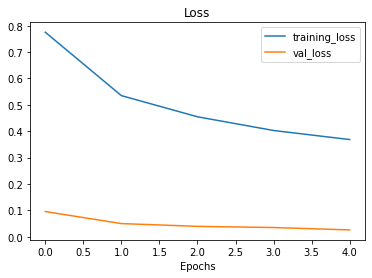

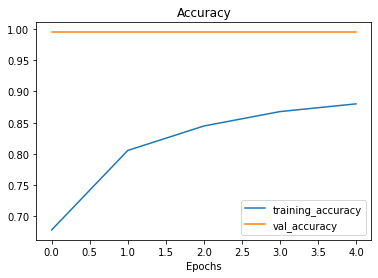

In [21]:
plot_loss_curves(history_mobile_net)

### **Unfreeze Some Layers**

In [22]:
# Unfreeze all of the layers in base model
base_model.trainable=True

# Refreeze every layer except the last 5 layer 
for layer in base_model.layers[:-5]:
  layer.trainable=False

### **Recompile The Model (Fine-Tuning)**

In [23]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=["accuracy"])

In [24]:
# Fine-tune for more 5 epochs
fine_tune_epochs = 10 # model has already done the 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 =10)

# Fine-tune our model
history_mobile_net_fine_tune = model_1.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_mobile_net.epoch[-1])

Epoch 5/10
340/340 [==============================] - 29s 66ms/step - loss: 0.3145 - accuracy: 0.8927 - val_loss: 0.0199 - val_accuracy: 0.9948
Epoch 6/10
340/340 [==============================] - 24s 69ms/step - loss: 0.2548 - accuracy: 0.9168 - val_loss: 0.0152 - val_accuracy: 0.9948
Epoch 7/10
340/340 [==============================] - 25s 72ms/step - loss: 0.2218 - accuracy: 0.9324 - val_loss: 0.0141 - val_accuracy: 0.9948
Epoch 8/10
340/340 [==============================] - 24s 70ms/step - loss: 0.1989 - accuracy: 0.9415 - val_loss: 0.0132 - val_accuracy: 0.9948
Epoch 9/10
340/340 [==============================] - 25s 72ms/step - loss: 0.1778 - accuracy: 0.9502 - val_loss: 0.0099 - val_accuracy: 0.9948
Epoch 10/10
340/340 [==============================] - 24s 69ms/step - loss: 0.1611 - accuracy: 0.9575 - val_loss: 0.0085 - val_accuracy: 0.9948


### **Evaluate Whole Dataset**

In [25]:
# Evaluate on the whole test dataset
fine_tune_results =model_1.evaluate(test_data)
fine_tune_results

43/43 [==============================] - 3s 72ms/step - loss: 0.1658 - accuracy: 0.9559


[0.16579943895339966, 0.9558823704719543]

### **Compare Feature Extraction and Fine Tuning**

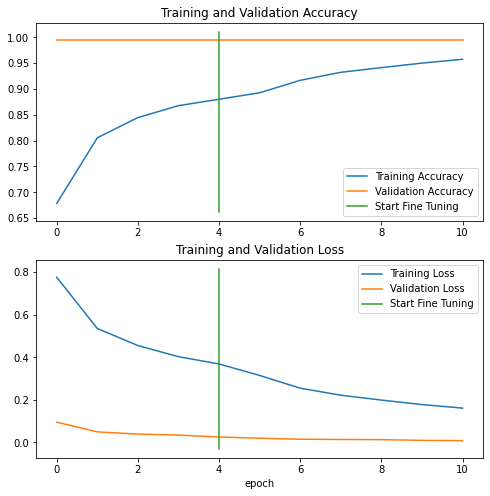

In [26]:
# Compare the historys of feature extraction model with fine-tuning model 
compare_historys(original_history=history_mobile_net,
                 new_history=history_mobile_net_fine_tune,
                 initial_epochs=5)

### **Make Prediction With Model**

In [27]:
# Make predictions with model
preds_probs = model_1.predict(test_data, verbose=1) # set verbosity to see how long it left

43/43 [==============================] - 4s 56ms/step


In [28]:
# Get the pred classes of each model
pred_classes = preds_probs.argmax(axis=1)

# How do they look like?
pred_classes[:10]

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
# To get our test dataset labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1,.....0,0], we want the index value where the index value "1" occurs
y_labels[:10] # look at the first 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### **Lets Make Visual Matrix**

In [30]:
from helper_functions import make_confusion_matrix

In [31]:
# Get a list of class names
class_names =test_data.class_names
class_names[:10]

['close_look', 'forward_look', 'left_look', 'right_look']

In [32]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-label print verticaly
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### changes (x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

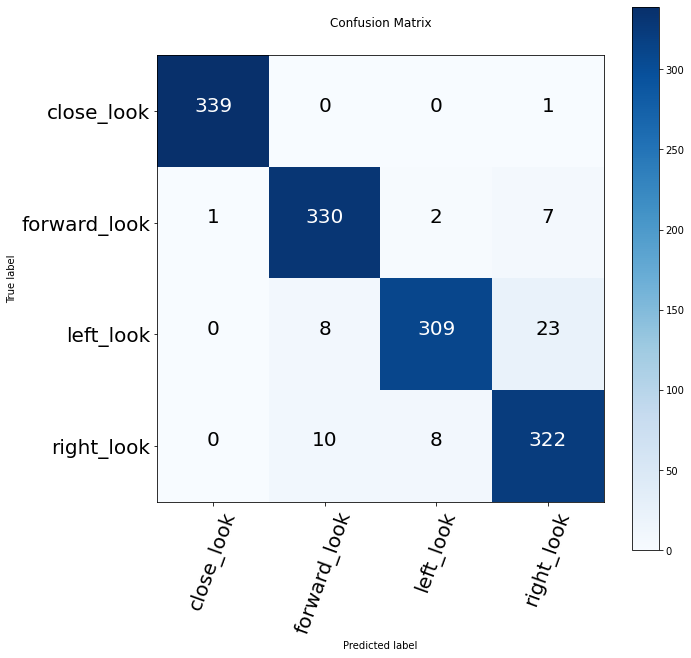

In [33]:
make_confusion_matrix(y_true=y_labels,
                       y_pred=pred_classes,
                       classes=class_names,
                      figsize=(10, 10),
                      text_size=20,
                      savefig=True)

### **F1-Scores and Precisions**

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       0.95      0.97      0.96       340
           2       0.97      0.91      0.94       340
           3       0.91      0.95      0.93       340

    accuracy                           0.96      1360
   macro avg       0.96      0.96      0.96      1360
weighted avg       0.96      0.96      0.96      1360



### **Turning F-1 Into DataFrame**

In [35]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.9970588235294118,
  'precision': 0.9970588235294118,
  'recall': 0.9970588235294118,
  'support': 340},
 '1': {'f1-score': 0.9593023255813955,
  'precision': 0.9482758620689655,
  'recall': 0.9705882352941176,
  'support': 340},
 '2': {'f1-score': 0.937784522003035,
  'precision': 0.9686520376175548,
  'recall': 0.9088235294117647,
  'support': 340},
 '3': {'f1-score': 0.9292929292929292,
  'precision': 0.9121813031161473,
  'recall': 0.9470588235294117,
  'support': 340},
 'accuracy': 0.9558823529411765,
 'macro avg': {'f1-score': 0.9558596501016928,
  'precision': 0.9565420065830198,
  'recall': 0.9558823529411764,
  'support': 1360},
 'weighted avg': {'f1-score': 0.9558596501016928,
  'precision': 0.9565420065830198,
  'recall': 0.9558823529411765,
  'support': 1360}}

In [36]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
     # Add names and f1-scores to new dictionary
     class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores     


{'close_look': 0.9970588235294118,
 'forward_look': 0.9593023255813955,
 'left_look': 0.937784522003035,
 'right_look': 0.9292929292929292}

In [37]:
import pandas as pd
f1_scores =pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                        "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores                        

,class_names,f1-score
0,close_look,0.997059
1,forward_look,0.959302
2,left_look,0.937785
3,right_look,0.929293


### **Visualize Predictions on Custom Images**

In [38]:
# Create a function to load and create a images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Read in an image from filename, turn it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename(str): path to target image
    image_shape(int): height/width dimension of target image size
    scale(bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
    image tensor of shape (img_shape, img_shape, 3)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3) 

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale Yes/no?
  if scale:
    # reshape the image (get all value between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale image for EffiecienNet model in TensorFlow   


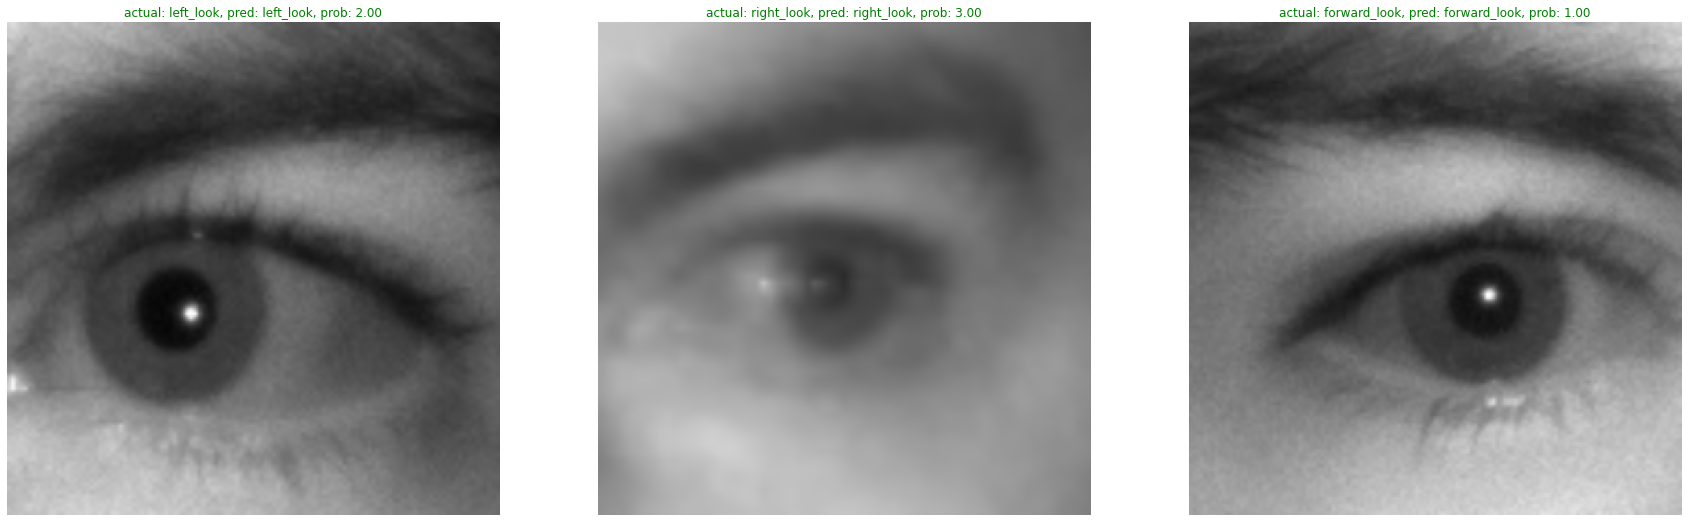

In [39]:
# Make preds on series of images
import os
import random

plt.figure(figsize=(30,30))
for i in range(3):
  # Choose a random image(s) from a random class(es)
  class_name =random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename


  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  # print(img.shape)
  img_expanded = tf.expand_dims(img, axis=0)
  # print(img_expanded.shape)
  pred_prob = model_1.predict(img_expanded) # get prediction probability array
  pred_class = class_names[pred_prob.argmax()] # get heighst prediction probability index and match it class_names list
  # print(pred_prob)
   # print(pred_class)

    # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # if predicted class matches truth class, make text green
    title_color = "g"
  else:
    title_color ="r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.argmax():.2f}", c=title_color)
  plt.axis(False);  

### **Test Out Model On Custom images**

In [43]:
img = '/content/left-look.jpg/'

(-0.5, 223.5, 223.5, -0.5)

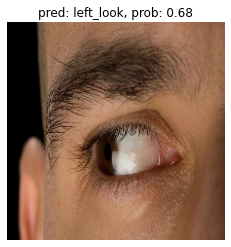

In [44]:
# Make prediction on and plot the custom food images

img = load_and_prep_image(img, scale=False) # don't need to do scale for our EfficienNetB0 model
pred_prob = model_1.predict(tf.expand_dims(img, axis=0)) # make prediction on the image with shape [1, 224,224, 1] (same shape as model trained on)
pred_class = class_names[pred_prob.argmax()] # get the index with heighest prediction probability
# plot the appropriate information
plt.figure()
plt.imshow(img/255.)
plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
plt.axis(False)

# **Model No 2 (Inception V3) Without Augmentation**

### **Create Model**

In [45]:
# Setup a base model and freeze its layer (this will extract features)
base_model = tf.keras.applications.InceptionV3(include_top=False)
base_model.trainable = False

# Setup a model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False) # put the base model in interface mode so weights which needs to be frozen, stay frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model_2=tf.keras.Model(inputs, outputs)

87924736/87910968 [==============================] - 1s 0us/step


In [46]:
# Get a summary of model we've been created
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_avg_pooling_layer (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_________________________________________________________________


### **Compiling and Fitting the model (Feature Extraction)**

In [47]:
# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_inception_v3 = model_2.fit(train_data,
                                           epochs=5, # fit to 5 epochs to keep experiment quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # validate on only 15% of test data during training 
                                           callbacks=[checkpoint_callback])

Epoch 1/5
340/340 [==============================] - 36s 90ms/step - loss: 1.6016 - accuracy: 0.7108 - val_loss: 0.1044 - val_accuracy: 0.9792
Epoch 2/5
340/340 [==============================] - 30s 86ms/step - loss: 0.3626 - accuracy: 0.8791 - val_loss: 0.3857 - val_accuracy: 0.8906
Epoch 3/5
340/340 [==============================] - 29s 83ms/step - loss: 0.3510 - accuracy: 0.8948 - val_loss: 0.1296 - val_accuracy: 0.9688
Epoch 4/5
340/340 [==============================] - 31s 91ms/step - loss: 0.3501 - accuracy: 0.8985 - val_loss: 0.1967 - val_accuracy: 0.9688
Epoch 5/5
340/340 [==============================] - 31s 89ms/step - loss: 0.2647 - accuracy: 0.9226 - val_loss: 0.0857 - val_accuracy: 0.9896


### **Evaluate The Model**

In [48]:
# Evaluate on the whole test dataset  
feature_extraction_results = model_2.evaluate(test_data)
feature_extraction_results

43/43 [==============================] - 5s 121ms/step - loss: 0.3210 - accuracy: 0.8743


[0.32103314995765686, 0.8742647171020508]

### **Plot The Graph**

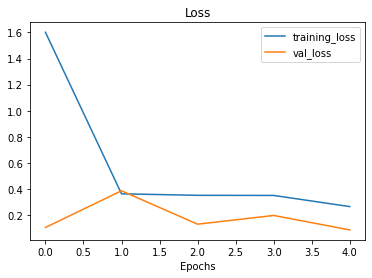

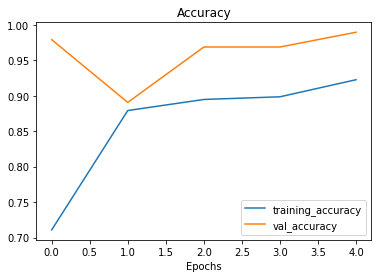

In [49]:
plot_loss_curves(history_inception_v3)

### **Unfreeze Some Layers**

In [50]:
# Unfreeze all of the layers in base model
base_model.trainable=True

# Refreeze every layer except the last 5 layer 
for layer in base_model.layers[:-5]:
  layer.trainable=False

### **Recompile The Model (Fine-Tuning)**

In [51]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=["accuracy"])

In [52]:
# What layers in the model are trainable?
for layer in model_2.layers:
  print(layer.name, layer.trainable)

input_layer True
inception_v3 True
global_avg_pooling_layer True
output_layer True


In [53]:
# Fine-tune for more 5 epochs
fine_tune_epochs = 10 # model has already done the 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 =10)

# Fine-tune our model
history_inception_v3_fine_tune = model_2.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_inception_v3.epoch[-1])

Epoch 5/10
340/340 [==============================] - 35s 90ms/step - loss: 0.1417 - accuracy: 0.9601 - val_loss: 0.1022 - val_accuracy: 0.9896
Epoch 6/10
340/340 [==============================] - 31s 90ms/step - loss: 0.1298 - accuracy: 0.9613 - val_loss: 0.0721 - val_accuracy: 0.9896
Epoch 7/10
340/340 [==============================] - 31s 90ms/step - loss: 0.1222 - accuracy: 0.9642 - val_loss: 0.0500 - val_accuracy: 0.9896
Epoch 8/10
340/340 [==============================] - 30s 87ms/step - loss: 0.1231 - accuracy: 0.9636 - val_loss: 0.0803 - val_accuracy: 0.9896
Epoch 9/10
340/340 [==============================] - 32s 92ms/step - loss: 0.1185 - accuracy: 0.9649 - val_loss: 0.0572 - val_accuracy: 0.9896
Epoch 10/10
340/340 [==============================] - 31s 91ms/step - loss: 0.1124 - accuracy: 0.9677 - val_loss: 0.0879 - val_accuracy: 0.9844


### **Evaluate the model**

In [54]:
# Evaluate on the whole test dataset
fine_tune_results =model_2.evaluate(test_data)
fine_tune_results

43/43 [==============================] - 4s 90ms/step - loss: 0.1071 - accuracy: 0.9647


[0.10709448158740997, 0.9647058844566345]

### **Compare Feature Extraction and Fine-Tuning**

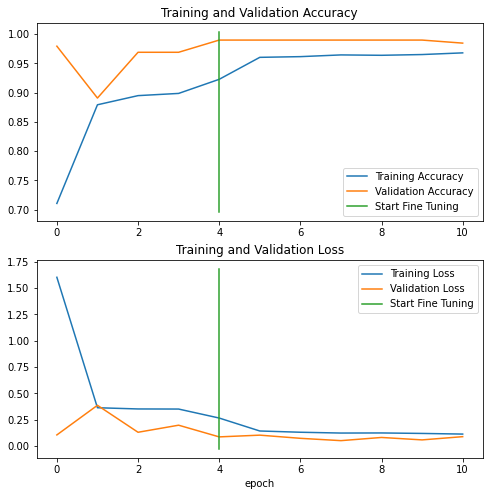

In [55]:
# Compare the historys of feature extraction model with fine-tuning model 
compare_historys(original_history=history_inception_v3,
                 new_history=history_inception_v3_fine_tune,
                 initial_epochs=5)

### **Making Predictions**

In [56]:
# Make predictions with model
preds_probs = model_2.predict(test_data, verbose=1) # set verbosity to see how long it left

43/43 [==============================] - 5s 84ms/step


In [57]:
# Get the pred classes of each model
pred_classes = preds_probs.argmax(axis=1)

# How do they look like?
pred_classes[:10]

array([3, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
# To get our test dataset labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1,.....0,0], we want the index value where the index value "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### **Confusion Matrix**

In [59]:
from helper_functions import make_confusion_matrix

In [60]:
# Get a list of class names
class_names =test_data.class_names
class_names[:10]

['close_look', 'forward_look', 'left_look', 'right_look']

In [61]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-label print verticaly
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### changes (x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

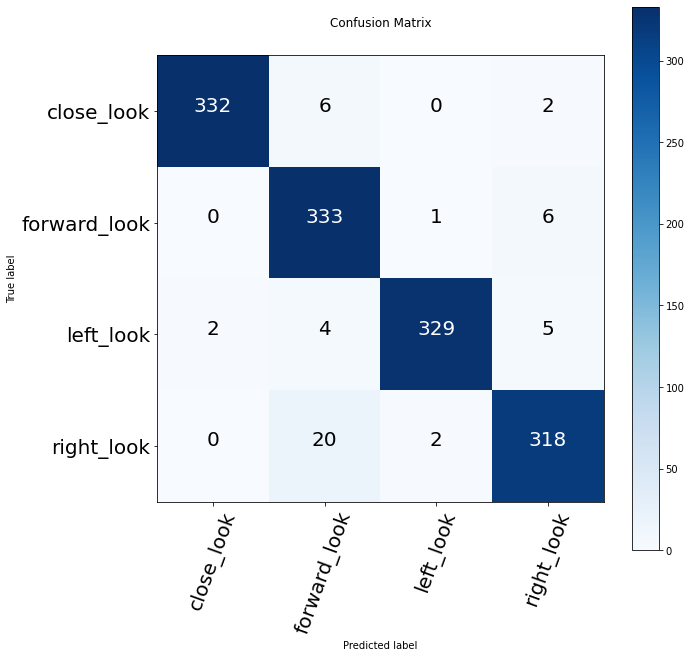

In [62]:
make_confusion_matrix(y_true=y_labels,
                       y_pred=pred_classes,
                       classes=class_names,
                      figsize=(10, 10),
                      text_size=20,
                      savefig=True)

### **Classification and F1-Scores**

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       340
           1       0.92      0.98      0.95       340
           2       0.99      0.97      0.98       340
           3       0.96      0.94      0.95       340

    accuracy                           0.96      1360
   macro avg       0.97      0.96      0.96      1360
weighted avg       0.97      0.96      0.96      1360



In [64]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.9851632047477744,
  'precision': 0.9940119760479041,
  'recall': 0.9764705882352941,
  'support': 340},
 '1': {'f1-score': 0.9473684210526316,
  'precision': 0.9173553719008265,
  'recall': 0.9794117647058823,
  'support': 340},
 '2': {'f1-score': 0.9791666666666667,
  'precision': 0.9909638554216867,
  'recall': 0.9676470588235294,
  'support': 340},
 '3': {'f1-score': 0.9478390461997019,
  'precision': 0.9607250755287009,
  'recall': 0.9352941176470588,
  'support': 340},
 'accuracy': 0.9647058823529412,
 'macro avg': {'f1-score': 0.9648843346666938,
  'precision': 0.9657640697247796,
  'recall': 0.9647058823529411,
  'support': 1360},
 'weighted avg': {'f1-score': 0.9648843346666935,
  'precision': 0.9657640697247796,
  'recall': 0.9647058823529412,
  'support': 1360}}

In [65]:
import pandas as pd
f1_scores =pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                        "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores                        

,class_names,f1-score
0,close_look,0.997059
1,forward_look,0.959302
2,left_look,0.937785
3,right_look,0.929293


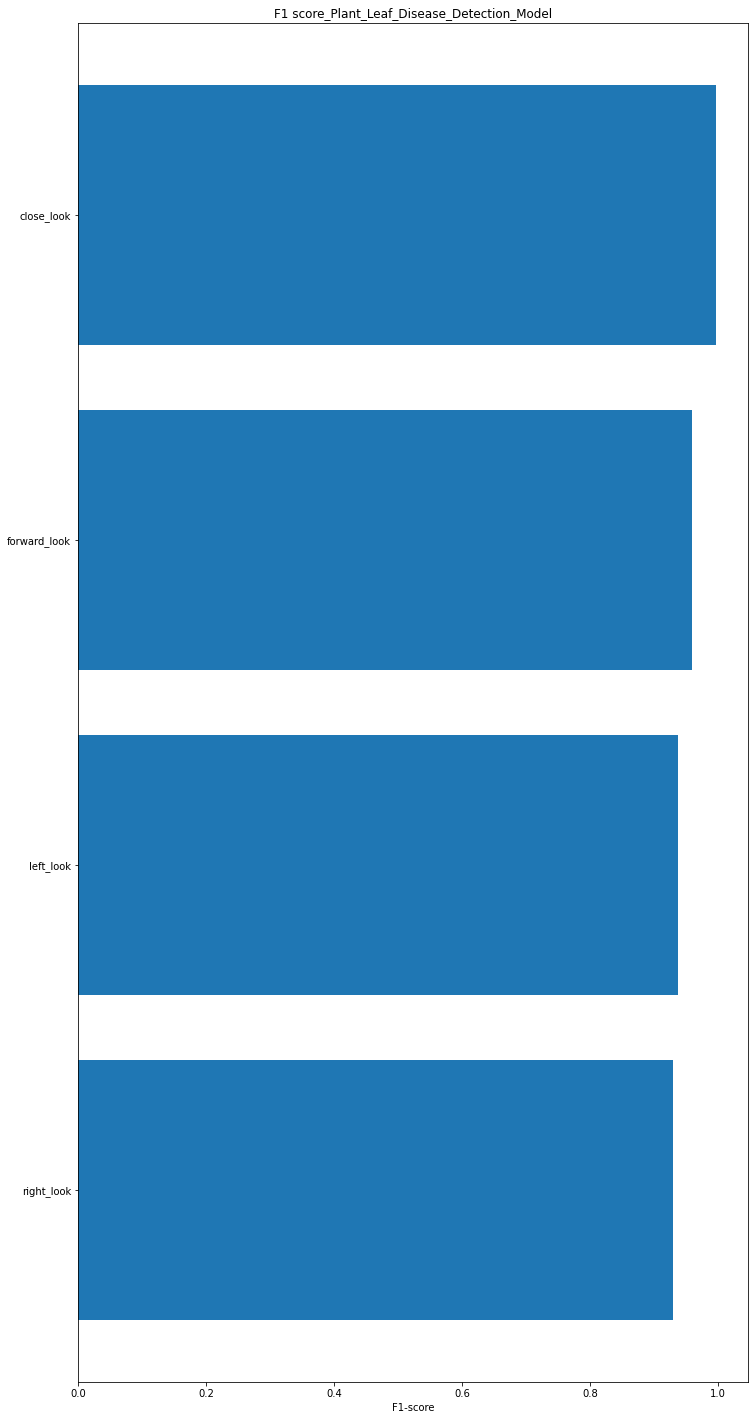

In [66]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values) # get f1-score value
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1 score_Plant_Leaf_Disease_Detection_Model")
ax.invert_yaxis(); # reverse the order of our plot


# Challenge: add value to the end of each bar of what the actual f1-score is 
# (hint: use the "autolabel" function from here: https://matplotlib.org/2.0.2/examples/api/barchart_demo.html) 

### **Visualize Prediction on Custom Images**

In [67]:
# Create a function to load and create a images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Read in an image from filename, turn it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename(str): path to target image
    image_shape(int): height/width dimension of target image size
    scale(bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
    image tensor of shape (img_shape, img_shape, 3)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3) 

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale Yes/no?
  if scale:
    # reshape the image (get all value between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale image for EffiecienNet model in TensorFlow   


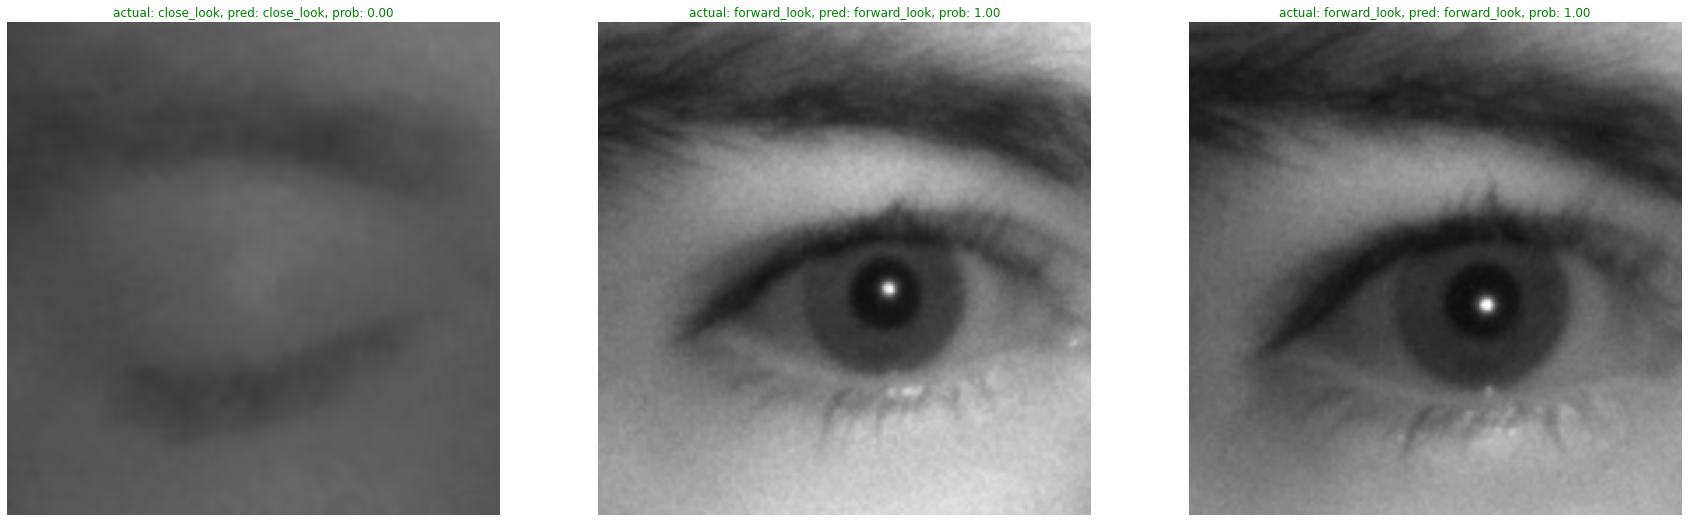

In [68]:
# Make preds on series of images
import os
import random

plt.figure(figsize=(30,30))
for i in range(3):
  # Choose a random image(s) from a random class(es)
  class_name =random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename


  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  # print(img.shape)
  img_expanded = tf.expand_dims(img, axis=0)
  # print(img_expanded.shape)
  pred_prob = model_2.predict(img_expanded) # get prediction probability array
  pred_class = class_names[pred_prob.argmax()] # get heighst prediction probability index and match it class_names list
  # print(pred_prob)
   # print(pred_class)

    # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # if predicted class matches truth class, make text green
    title_color = "g"
  else:
    title_color ="r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.argmax():.2f}", c=title_color)
  plt.axis(False);  

### **Predict on Custom Image**

In [69]:
img = '/content/right-look.jpg'

(-0.5, 223.5, 223.5, -0.5)

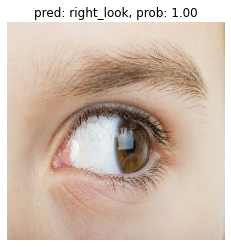

In [70]:
# Make prediction on and plot the custom food images

img = load_and_prep_image(img, scale=False) # don't need to do scale for our EfficienNetB0 model
pred_prob = model_2.predict(tf.expand_dims(img, axis=0)) # make prediction on the image with shape [1, 224,224, 1] (same shape as model trained on)
pred_class = class_names[pred_prob.argmax()] # get the index with heighest prediction probability
# plot the appropriate information
plt.figure()
plt.imshow(img/255.)
plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
plt.axis(False)

# **Model No 3  (NASNET Mobile) Without Augmentation**

### **Creating Model**

In [71]:
# Setup a base model and freeze its layer (this will extract features)
base_model = tf.keras.applications.NASNetMobile(include_top=False)
base_model.trainable = False

# Setup a model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False) # put the base model in interface mode so weights which needs to be frozen, stay frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model_3=tf.keras.Model(inputs, outputs)

20004864/19993432 [==============================] - 0s 0us/step


In [72]:
# Get a summary of model we've been created
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_avg_pooling_layer (G  (None, 1056)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 4)                 4228      
                                                                 
Total params: 4,273,944
Trainable params: 4,228
Non-trainable params: 4,269,716
_________________________________________________________________


### **Compiling and Fitting The Model**

In [73]:
# Compile
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_NasNet_mobile = model_3.fit(train_data,
                                           epochs=5, # fit to 5 epochs to keep experiment quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # validate on only 15% of test data during training 
                                           callbacks=[checkpoint_callback])

Epoch 1/5
340/340 [==============================] - 56s 111ms/step - loss: 1.2427 - accuracy: 0.5748 - val_loss: 0.2366 - val_accuracy: 0.9375
Epoch 2/5
340/340 [==============================] - 35s 103ms/step - loss: 0.6609 - accuracy: 0.7515 - val_loss: 0.1966 - val_accuracy: 0.9479
Epoch 3/5
340/340 [==============================] - 39s 112ms/step - loss: 0.5619 - accuracy: 0.8043 - val_loss: 0.1851 - val_accuracy: 0.9531
Epoch 4/5
340/340 [==============================] - 30s 88ms/step - loss: 0.5094 - accuracy: 0.8275 - val_loss: 0.1531 - val_accuracy: 0.9531
Epoch 5/5
340/340 [==============================] - 31s 90ms/step - loss: 0.4691 - accuracy: 0.8395 - val_loss: 0.1682 - val_accuracy: 0.9531


### **Evaluate The Model**

In [74]:
# Evaluate on the whole test dataset  
feature_extraction_results = model_3.evaluate(test_data)
feature_extraction_results

43/43 [==============================] - 6s 126ms/step - loss: 0.4284 - accuracy: 0.8566


[0.42837628722190857, 0.8566176295280457]

### **Plot The Graph**

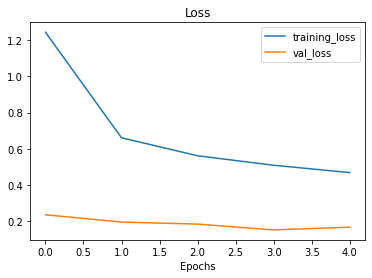

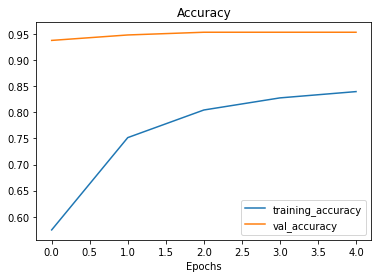

In [75]:
plot_loss_curves(history_NasNet_mobile)

### **Unfreeze Some Layers**

In [76]:
# Unfreeze all of the layers in base model
base_model.trainable=True

# Refreeze every layer except the last 5 layer 
for layer in base_model.layers[:-5]:
  layer.trainable=False

### **Recompile The Model (Fine-Tuning)**

In [77]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=["accuracy"])

In [78]:
# Fine-tune for more 5 epochs
fine_tune_epochs = 10 # model has already done the 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 =10)

# Fine-tune our model
history_NasNet_mobile_fine_tune = model_3.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_mobile_net.epoch[-1])

Epoch 5/10
340/340 [==============================] - 49s 96ms/step - loss: 0.4353 - accuracy: 0.8585 - val_loss: 0.2045 - val_accuracy: 0.9479
Epoch 6/10
340/340 [==============================] - 33s 96ms/step - loss: 0.4300 - accuracy: 0.8598 - val_loss: 0.1958 - val_accuracy: 0.9479
Epoch 7/10
340/340 [==============================] - 28s 81ms/step - loss: 0.4264 - accuracy: 0.8609 - val_loss: 0.2011 - val_accuracy: 0.9479
Epoch 8/10
340/340 [==============================] - 36s 105ms/step - loss: 0.4221 - accuracy: 0.8601 - val_loss: 0.1891 - val_accuracy: 0.9479
Epoch 9/10
340/340 [==============================] - 32s 93ms/step - loss: 0.4181 - accuracy: 0.8624 - val_loss: 0.1838 - val_accuracy: 0.9479
Epoch 10/10
340/340 [==============================] - 31s 90ms/step - loss: 0.4153 - accuracy: 0.8640 - val_loss: 0.1889 - val_accuracy: 0.9479


### **Evaluate The Model**

In [79]:
# Evaluate on the whole test dataset
fine_tune_results =model_3.evaluate(test_data)
fine_tune_results

43/43 [==============================] - 3s 78ms/step - loss: 0.3971 - accuracy: 0.8750


[0.3970590829849243, 0.875]

### **Compare The Graphs**

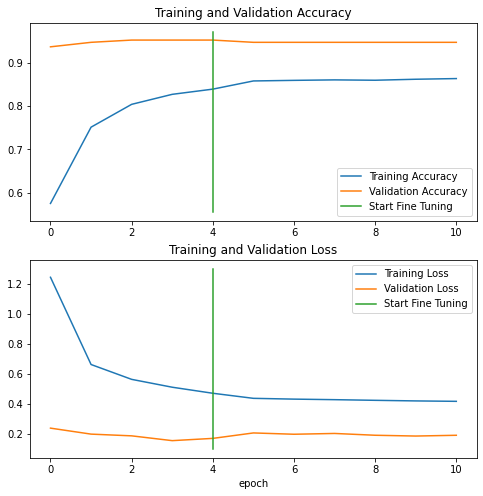

In [80]:
# Compare the historys of feature extraction model with fine-tuning model 
compare_historys(original_history=history_NasNet_mobile,
                 new_history=history_NasNet_mobile_fine_tune,
                 initial_epochs=5)

### **Making Predictions**

In [81]:
# Make predictions with model
preds_probs = model_3.predict(test_data, verbose=1) # set verbosity to see how long it left

43/43 [==============================] - 6s 72ms/step


In [82]:
# Get the pred classes of each model
pred_classes = preds_probs.argmax(axis=1)

# How do they look like?
pred_classes[:10]

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
# To get our test dataset labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1,.....0,0], we want the index value where the index value "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### **Confusion Matrix**

In [84]:
from helper_functions import make_confusion_matrix

In [85]:
# Get a list of class names
class_names =test_data.class_names
class_names[:10]

['close_look', 'forward_look', 'left_look', 'right_look']

In [86]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-label print verticaly
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### changes (x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

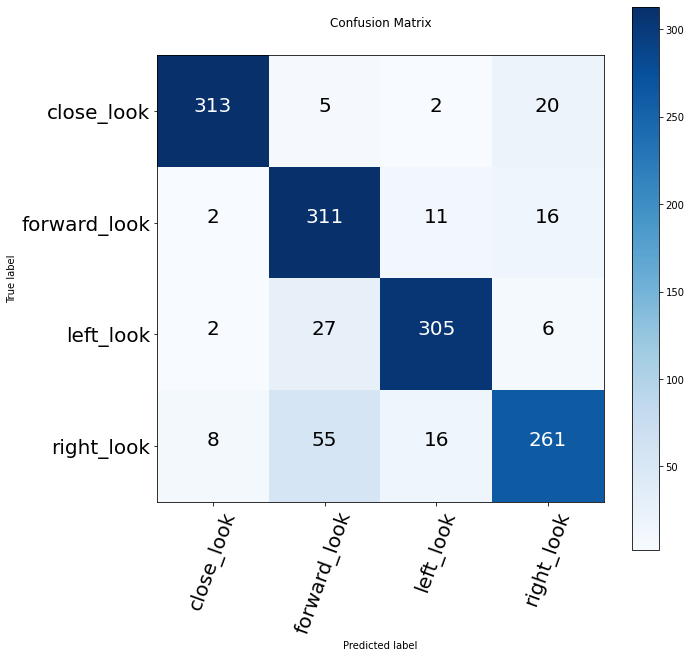

In [87]:
make_confusion_matrix(y_true=y_labels,
                       y_pred=pred_classes,
                       classes=class_names,
                      figsize=(10, 10),
                      text_size=20,
                      savefig=True)

### **Classification Reports**

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       340
           1       0.78      0.91      0.84       340
           2       0.91      0.90      0.91       340
           3       0.86      0.77      0.81       340

    accuracy                           0.88      1360
   macro avg       0.88      0.88      0.88      1360
weighted avg       0.88      0.88      0.88      1360



In [89]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.9413533834586466,
  'precision': 0.963076923076923,
  'recall': 0.9205882352941176,
  'support': 340},
 '1': {'f1-score': 0.8428184281842819,
  'precision': 0.7814070351758794,
  'recall': 0.9147058823529411,
  'support': 340},
 '2': {'f1-score': 0.9050445103857567,
  'precision': 0.9131736526946108,
  'recall': 0.8970588235294118,
  'support': 340},
 '3': {'f1-score': 0.8118195956454122,
  'precision': 0.8613861386138614,
  'recall': 0.7676470588235295,
  'support': 340},
 'accuracy': 0.875,
 'macro avg': {'f1-score': 0.8752589794185244,
  'precision': 0.8797609373903186,
  'recall': 0.875,
  'support': 1360},
 'weighted avg': {'f1-score': 0.8752589794185244,
  'precision': 0.8797609373903186,
  'recall': 0.875,
  'support': 1360}}

In [90]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
     # Add names and f1-scores to new dictionary
     class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores     


{'close_look': 0.9413533834586466,
 'forward_look': 0.8428184281842819,
 'left_look': 0.9050445103857567,
 'right_look': 0.8118195956454122}

### **Turn it into dataframes**

In [91]:

import pandas as pd
f1_scores =pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                        "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores                        

,class_names,f1-score
0,close_look,0.941353
2,left_look,0.905045
1,forward_look,0.842818
3,right_look,0.811820


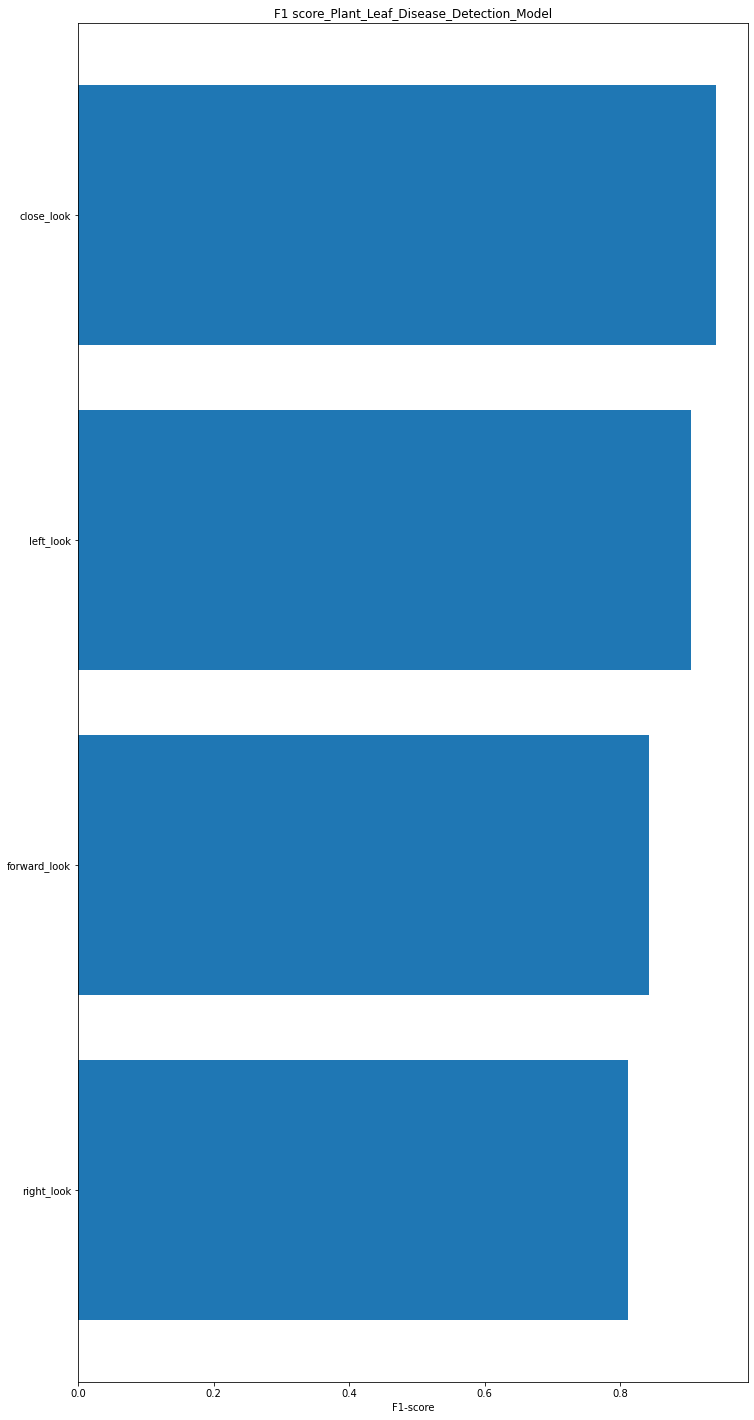

In [92]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values) # get f1-score value
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1 score_Plant_Leaf_Disease_Detection_Model")
ax.invert_yaxis(); # reverse the order of our plot


# Challenge: add value to the end of each bar of what the actual f1-score is 
# (hint: use the "autolabel" function from here: https://matplotlib.org/2.0.2/examples/api/barchart_demo.html) 

### **Visualize Prediction on Custom Images**

In [93]:
# Create a function to load and create a images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Read in an image from filename, turn it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename(str): path to target image
    image_shape(int): height/width dimension of target image size
    scale(bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
    image tensor of shape (img_shape, img_shape, 3)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3) 

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale Yes/no?
  if scale:
    # reshape the image (get all value between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale image for EffiecienNet model in TensorFlow   


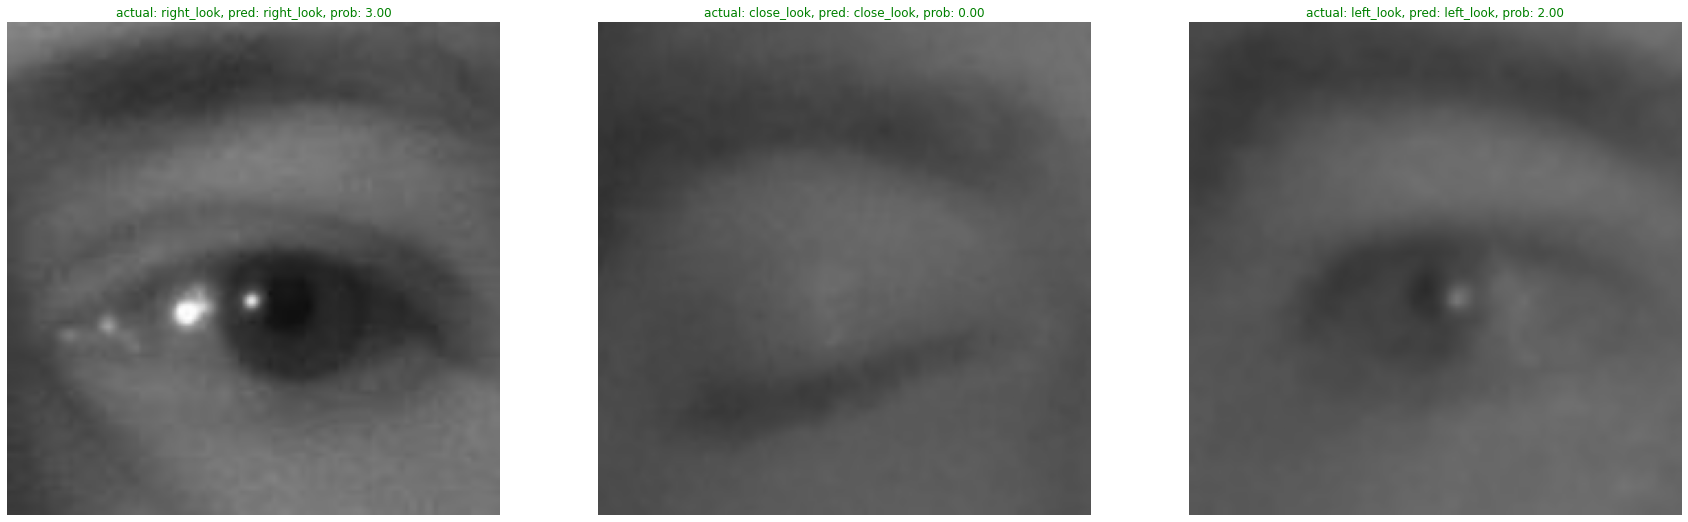

In [94]:
# Make preds on series of images
import os
import random

plt.figure(figsize=(30,30))
for i in range(3):
  # Choose a random image(s) from a random class(es)
  class_name =random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename


  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  # print(img.shape)
  img_expanded = tf.expand_dims(img, axis=0)
  # print(img_expanded.shape)
  pred_prob = model_3.predict(img_expanded) # get prediction probability array
  pred_class = class_names[pred_prob.argmax()] # get heighst prediction probability index and match it class_names list
  # print(pred_prob)
   # print(pred_class)

    # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # if predicted class matches truth class, make text green
    title_color = "g"
  else:
    title_color ="r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.argmax():.2f}", c=title_color)
  plt.axis(False);  

# **Model No 4 (ResNet50) Without Augmentation**

### **Create Model**

In [98]:
# Setup a base model and freeze its layer (this will extract features)
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False)
base_model.trainable = False

# Setup a model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False) # put the base model in interface mode so weights which needs to be frozen, stay frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model_4=tf.keras.Model(inputs, outputs)

In [99]:
# Get a summary of model we've been created
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_avg_pooling_layer (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


### **Compiling and Fitting the Model (Feature Extraction)**

In [100]:
# Compile
model_4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_resnet_50 = model_4.fit(train_data,
                                           epochs=5, # fit to 5 epochs to keep experiment quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # validate on only 15% of test data during training 
                                           callbacks=[checkpoint_callback])

Epoch 1/5
340/340 [==============================] - 39s 105ms/step - loss: 0.5011 - accuracy: 0.8100 - val_loss: 0.0470 - val_accuracy: 0.9948
Epoch 2/5
340/340 [==============================] - 37s 108ms/step - loss: 0.2668 - accuracy: 0.9215 - val_loss: 0.0305 - val_accuracy: 0.9948
Epoch 3/5
340/340 [==============================] - 38s 111ms/step - loss: 0.2030 - accuracy: 0.9434 - val_loss: 0.0228 - val_accuracy: 0.9948
Epoch 4/5
340/340 [==============================] - 38s 111ms/step - loss: 0.1720 - accuracy: 0.9535 - val_loss: 0.0180 - val_accuracy: 0.9948
Epoch 5/5
340/340 [==============================] - 38s 109ms/step - loss: 0.1453 - accuracy: 0.9615 - val_loss: 0.0204 - val_accuracy: 0.9896


### **Evaluating The Model**

In [101]:
# Evaluate on the whole test dataset  
feature_extraction_results = model_4.evaluate(test_data)
feature_extraction_results

43/43 [==============================] - 5s 121ms/step - loss: 0.1407 - accuracy: 0.9588


[0.14073991775512695, 0.9588235020637512]

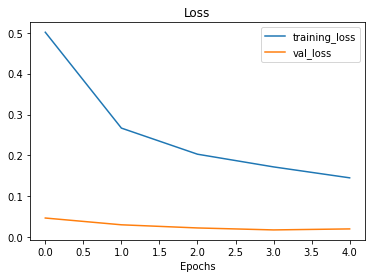

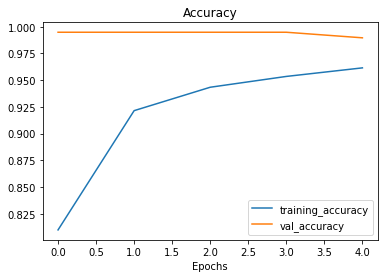

In [102]:
plot_loss_curves(history_resnet_50)

### **Unfreeze Some Layers**

In [103]:
# Unfreeze all of the layers in base model
base_model_4.trainable=True

# Refreeze every layer except the last 5 layer 
for layer in base_model.layers[:-5]:
  layer.trainable=False

### **Recompile The Model (Fine-Tuning)**

In [104]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
model_4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=["accuracy"])

In [105]:
# Fine-tune for more 5 epochs
fine_tune_epochs = 10 # model has already done the 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 =10)

# Fine-tune our model
history_resnet_50_fine_tune = model_4.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_resnet_50.epoch[-1])

Epoch 5/10
340/340 [==============================] - 44s 117ms/step - loss: 0.1200 - accuracy: 0.9645 - val_loss: 0.0135 - val_accuracy: 0.9948
Epoch 6/10
340/340 [==============================] - 39s 114ms/step - loss: 0.0705 - accuracy: 0.9807 - val_loss: 0.0152 - val_accuracy: 0.9896
Epoch 7/10
340/340 [==============================] - 39s 114ms/step - loss: 0.0473 - accuracy: 0.9886 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 8/10
340/340 [==============================] - 38s 109ms/step - loss: 0.0338 - accuracy: 0.9917 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 9/10
340/340 [==============================] - 39s 114ms/step - loss: 0.0284 - accuracy: 0.9935 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 10/10
340/340 [==============================] - 38s 111ms/step - loss: 0.0234 - accuracy: 0.9937 - val_loss: 0.0037 - val_accuracy: 1.0000


### **Evaluate Whole Dataset**

In [106]:
# Evaluate on the whole test dataset
fine_tune_results =model_4.evaluate(test_data)
fine_tune_results

43/43 [==============================] - 5s 107ms/step - loss: 0.0644 - accuracy: 0.9809


[0.06444602459669113, 0.9808823466300964]

### **Compare the Graph**

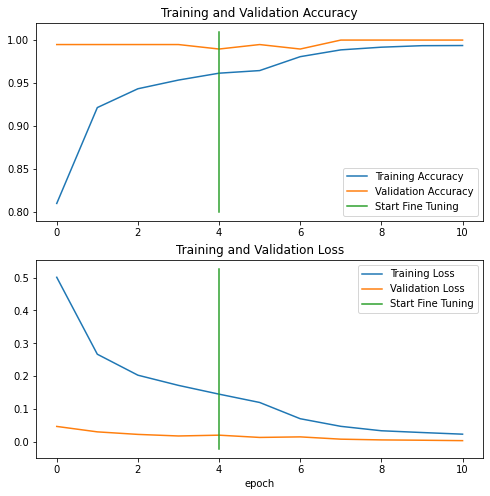

In [107]:
# Compare the historys of feature extraction model with fine-tuning model 
compare_historys(original_history=history_resnet_50,
                 new_history=history_resnet_50_fine_tune,
                 initial_epochs=5)

### **Make Predictions**

In [108]:
# Make predictions with model
preds_probs = model_4.predict(test_data, verbose=1) # set verbosity to see how long it left

43/43 [==============================] - 5s 98ms/step


In [109]:
# Get the pred classes of each model
pred_classes = preds_probs.argmax(axis=1)

# How do they look like?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [110]:
# To get our test dataset labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1,.....0,0], we want the index value where the index value "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### **Confusion Matrix**

In [111]:
from helper_functions import make_confusion_matrix

In [112]:
# Get a list of class names
class_names =test_data.class_names
class_names[:10]

['close_look', 'forward_look', 'left_look', 'right_look']

In [113]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-label print verticaly
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### changes (x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

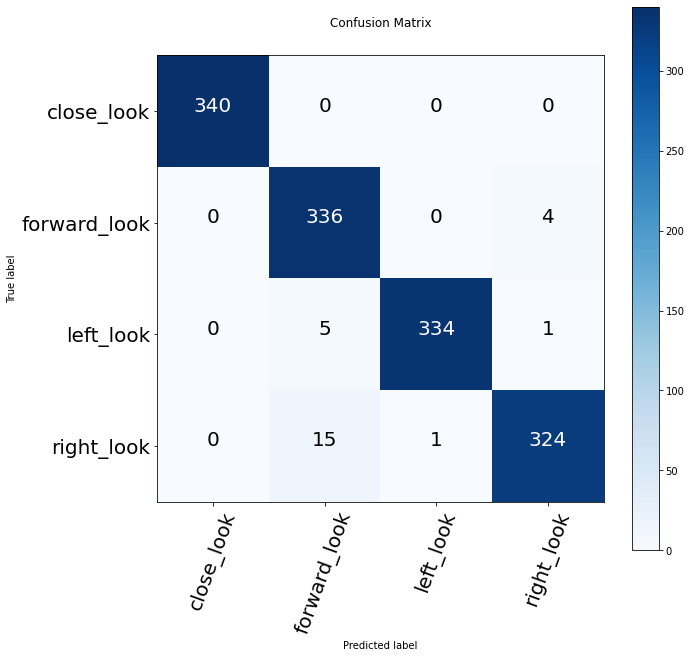

In [114]:
make_confusion_matrix(y_true=y_labels,
                       y_pred=pred_classes,
                       classes=class_names,
                      figsize=(10, 10),
                      text_size=20,
                      savefig=True)

### **Classification Report**

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       0.94      0.99      0.97       340
           2       1.00      0.98      0.99       340
           3       0.98      0.95      0.97       340

    accuracy                           0.98      1360
   macro avg       0.98      0.98      0.98      1360
weighted avg       0.98      0.98      0.98      1360



In [116]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 340},
 '1': {'f1-score': 0.9655172413793103,
  'precision': 0.9438202247191011,
  'recall': 0.9882352941176471,
  'support': 340},
 '2': {'f1-score': 0.9896296296296296,
  'precision': 0.9970149253731343,
  'recall': 0.9823529411764705,
  'support': 340},
 '3': {'f1-score': 0.9686098654708519,
  'precision': 0.9848024316109423,
  'recall': 0.9529411764705882,
  'support': 340},
 'accuracy': 0.9808823529411764,
 'macro avg': {'f1-score': 0.980939184119948,
  'precision': 0.9814093954257944,
  'recall': 0.9808823529411765,
  'support': 1360},
 'weighted avg': {'f1-score': 0.980939184119948,
  'precision': 0.9814093954257943,
  'recall': 0.9808823529411764,
  'support': 1360}}

In [117]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
     # Add names and f1-scores to new dictionary
     class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores     


{'close_look': 1.0,
 'forward_look': 0.9655172413793103,
 'left_look': 0.9896296296296296,
 'right_look': 0.9686098654708519}

In [118]:
import pandas as pd
f1_scores =pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                        "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores                        

,class_names,f1-score
0,close_look,1.000000
2,left_look,0.989630
3,right_look,0.968610
1,forward_look,0.965517


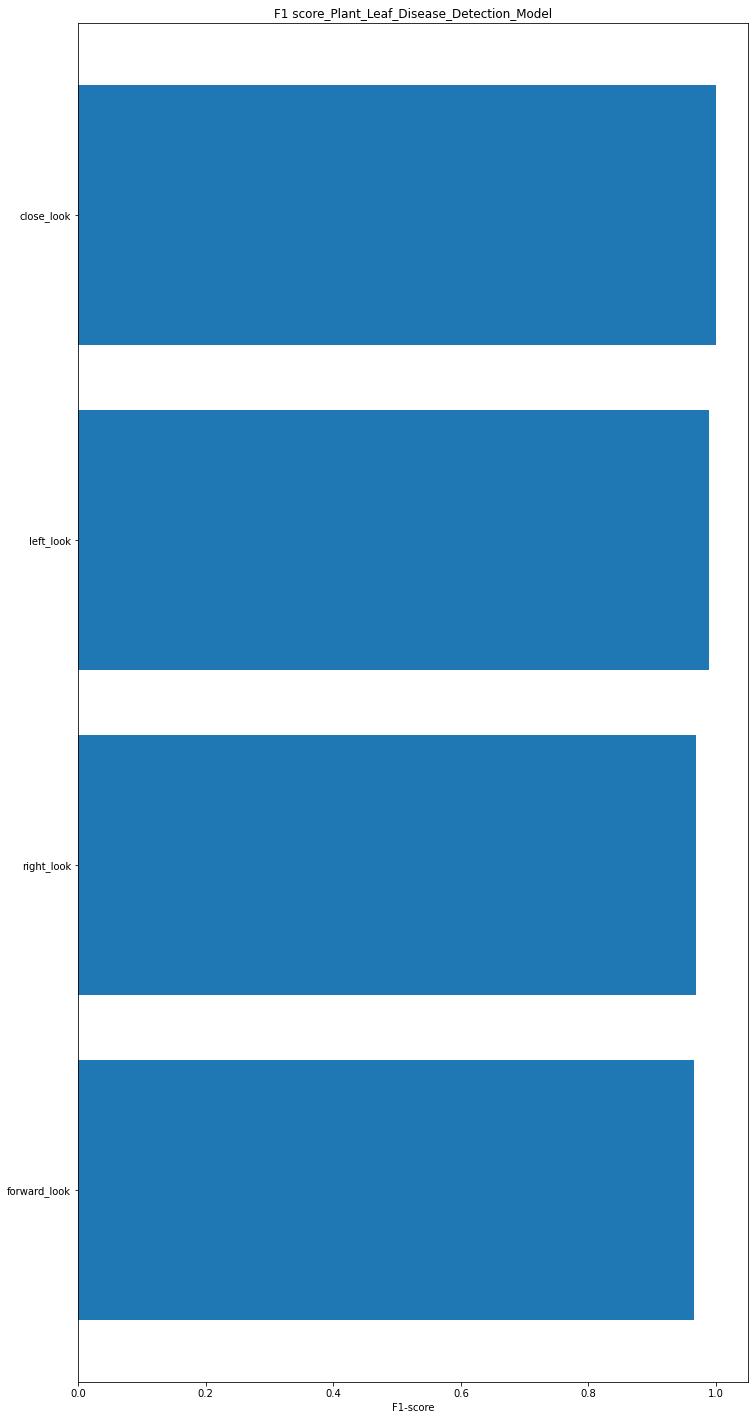

In [119]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values) # get f1-score value
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1 score_Plant_Leaf_Disease_Detection_Model")
ax.invert_yaxis(); # reverse the order of our plot


# Challenge: add value to the end of each bar of what the actual f1-score is 
# (hint: use the "autolabel" function from here: https://matplotlib.org/2.0.2/examples/api/barchart_demo.html) 

### **Visualize Prediction on Custom Images**

In [120]:
# Create a function to load and create a images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Read in an image from filename, turn it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename(str): path to target image
    image_shape(int): height/width dimension of target image size
    scale(bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
    image tensor of shape (img_shape, img_shape, 3)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3) 

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale Yes/no?
  if scale:
    # reshape the image (get all value between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale image for EffiecienNet model in TensorFlow   


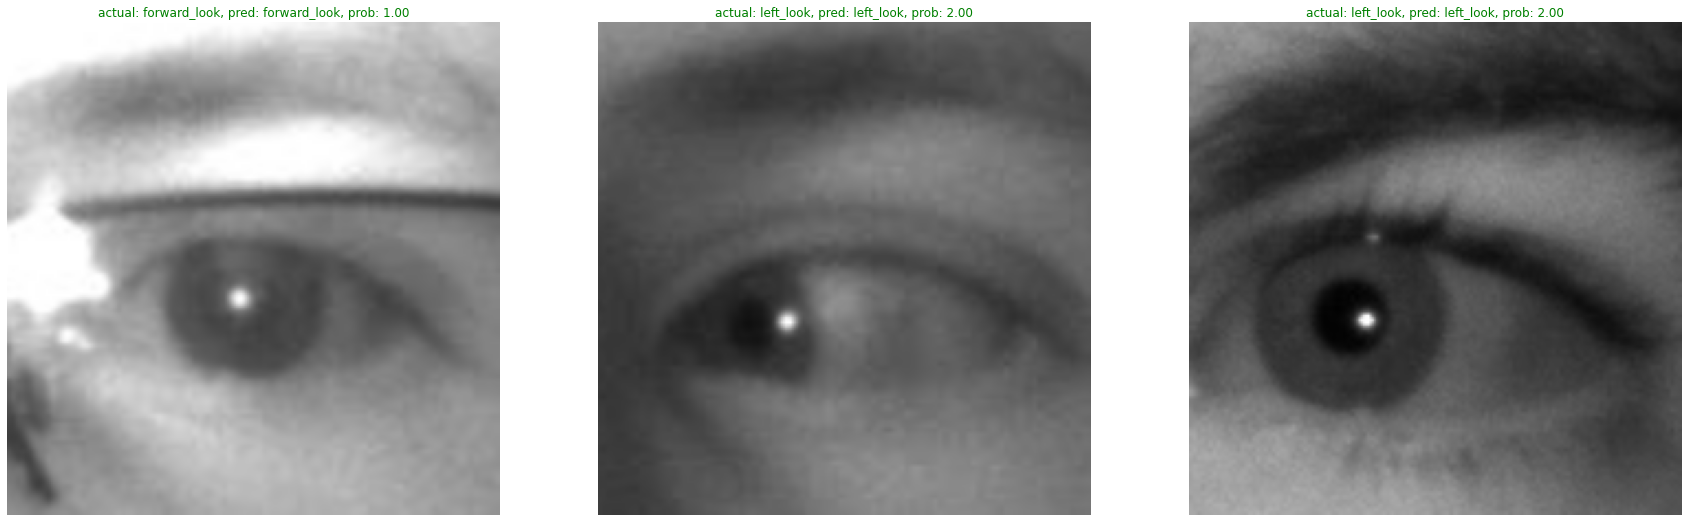

In [121]:
# Make preds on series of images
import os
import random

plt.figure(figsize=(30,30))
for i in range(3):
  # Choose a random image(s) from a random class(es)
  class_name =random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename


  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  # print(img.shape)
  img_expanded = tf.expand_dims(img, axis=0)
  # print(img_expanded.shape)
  pred_prob = model_4.predict(img_expanded) # get prediction probability array
  pred_class = class_names[pred_prob.argmax()] # get heighst prediction probability index and match it class_names list
  # print(pred_prob)
   # print(pred_class)

    # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # if predicted class matches truth class, make text green
    title_color = "g"
  else:
    title_color ="r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.argmax():.2f}", c=title_color)
  plt.axis(False);  

### **Test on Custom Images**

# **Model No 5 (MobileNet) Without Augmentation**

### **Create Model**

In [127]:
# Setup a base model and freeze its layer (this will extract features)
base_model = tf.keras.applications.MobileNet(include_top=False)
base_model.trainable = False

# Setup a model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False) # put the base model in interface mode so weights which needs to be frozen, stay frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model_5=tf.keras.Model(inputs, outputs)

17235968/17225924 [==============================] - 0s 0us/step


In [128]:
# Get a summary of model we've been created
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 global_avg_pooling_layer (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 4)                 4100      
                                                                 
Total params: 3,232,964
Trainable params: 4,100
Non-trainable params: 3,228,864
_________________________________________________________________


### **Compiling and Fitting the Model (Feature Extraction)**

In [129]:
# Compile
model_5.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_mobile_net = model_5.fit(train_data,
                                           epochs=5, # fit to 5 epochs to keep experiment quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # validate on only 15% of test data during training 
                                           callbacks=[checkpoint_callback])

Epoch 1/5
340/340 [==============================] - 17s 44ms/step - loss: 1.0002 - accuracy: 0.5817 - val_loss: 0.3261 - val_accuracy: 0.9479
Epoch 2/5
340/340 [==============================] - 20s 58ms/step - loss: 0.7192 - accuracy: 0.7336 - val_loss: 0.2878 - val_accuracy: 0.9427
Epoch 3/5
340/340 [==============================] - 20s 57ms/step - loss: 0.6046 - accuracy: 0.7973 - val_loss: 0.2204 - val_accuracy: 0.9896
Epoch 4/5
340/340 [==============================] - 19s 56ms/step - loss: 0.5290 - accuracy: 0.8334 - val_loss: 0.1724 - val_accuracy: 0.9948
Epoch 5/5
340/340 [==============================] - 21s 61ms/step - loss: 0.4755 - accuracy: 0.8587 - val_loss: 0.1408 - val_accuracy: 0.9948


### **Evaluate The Model**

In [130]:
# Evaluate on the whole test dataset  
feature_extraction_results = model_5.evaluate(test_data)
feature_extraction_results

43/43 [==============================] - 3s 73ms/step - loss: 0.4352 - accuracy: 0.8654


[0.43524983525276184, 0.8654412031173706]

### **Plot the Graph**

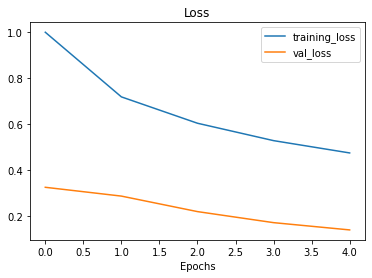

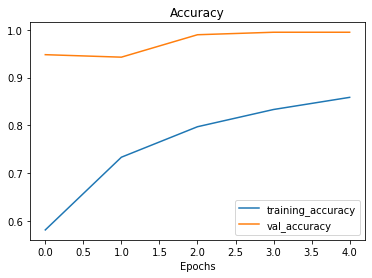

In [131]:
plot_loss_curves(history_mobile_net)

### **Unfreeze Some Layers**

In [139]:
# Unfreeze all of the layers in base model
base_model.trainable=True

# Refreeze every layer except the last 5 layer 
for layer in base_model.layers[:-5]:
  layer.trainable=False

### **Recompile the Model (Fine-Tuning)**

In [140]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
model_5.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=["accuracy"])

In [142]:
# Fine-tune for more 5 epochs
fine_tune_epochs = 10 # model has already done the 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 =10)

# Fine-tune our model
history_mobile_net_fine_tune = model_5.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_mobile_net.epoch[-1])

Epoch 5/10
340/340 [==============================] - 17s 46ms/step - loss: 0.5299 - accuracy: 0.7948 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 6/10
340/340 [==============================] - 16s 45ms/step - loss: 0.3601 - accuracy: 0.8644 - val_loss: 0.0807 - val_accuracy: 0.9792
Epoch 7/10
340/340 [==============================] - 16s 45ms/step - loss: 0.3148 - accuracy: 0.8818 - val_loss: 0.0197 - val_accuracy: 0.9948
Epoch 8/10
340/340 [==============================] - 16s 46ms/step - loss: 0.2834 - accuracy: 0.8992 - val_loss: 0.0765 - val_accuracy: 0.9792
Epoch 9/10
340/340 [==============================] - 16s 45ms/step - loss: 0.2420 - accuracy: 0.9165 - val_loss: 0.0270 - val_accuracy: 0.9948
Epoch 10/10
340/340 [==============================] - 16s 45ms/step - loss: 0.2383 - accuracy: 0.9178 - val_loss: 0.0140 - val_accuracy: 0.9948


### **Evaluate The Model**

In [143]:
# Evaluate on the whole test dataset
fine_tune_results =model_5.evaluate(test_data)
fine_tune_results

43/43 [==============================] - 2s 42ms/step - loss: 0.2133 - accuracy: 0.9221


[0.21330136060714722, 0.9220588207244873]

### **Compare The Graph**

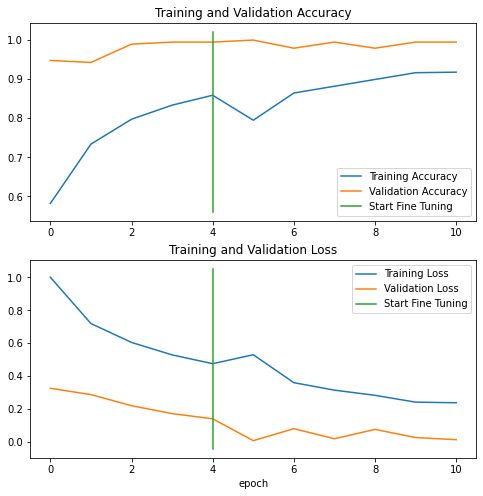

In [144]:
# Compare the historys of feature extraction model with fine-tuning model 
compare_historys(original_history=history_mobile_net,
                 new_history=history_mobile_net_fine_tune,
                 initial_epochs=5)

### **Making Predictions**

In [145]:
# Make predictions with model
preds_probs = model_5.predict(test_data, verbose=1) # set verbosity to see how long it left

43/43 [==============================] - 3s 43ms/step


In [146]:
# To get our test dataset labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1,.....0,0], we want the index value where the index value "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### **Confusion Matrix**

In [147]:
# Get a list of class names
class_names =test_data.class_names
class_names[:10]

['close_look', 'forward_look', 'left_look', 'right_look']

In [148]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-label print verticaly
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### changes (x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

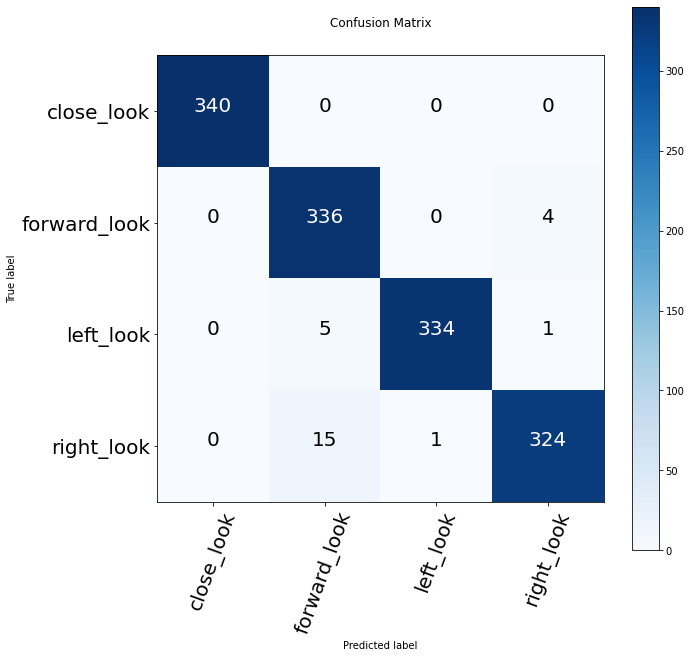

In [149]:
make_confusion_matrix(y_true=y_labels,
                       y_pred=pred_classes,
                       classes=class_names,
                      figsize=(10, 10),
                      text_size=20,
                      savefig=True)

### **Classification Report**

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       0.94      0.99      0.97       340
           2       1.00      0.98      0.99       340
           3       0.98      0.95      0.97       340

    accuracy                           0.98      1360
   macro avg       0.98      0.98      0.98      1360
weighted avg       0.98      0.98      0.98      1360



In [151]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 340},
 '1': {'f1-score': 0.9655172413793103,
  'precision': 0.9438202247191011,
  'recall': 0.9882352941176471,
  'support': 340},
 '2': {'f1-score': 0.9896296296296296,
  'precision': 0.9970149253731343,
  'recall': 0.9823529411764705,
  'support': 340},
 '3': {'f1-score': 0.9686098654708519,
  'precision': 0.9848024316109423,
  'recall': 0.9529411764705882,
  'support': 340},
 'accuracy': 0.9808823529411764,
 'macro avg': {'f1-score': 0.980939184119948,
  'precision': 0.9814093954257944,
  'recall': 0.9808823529411765,
  'support': 1360},
 'weighted avg': {'f1-score': 0.980939184119948,
  'precision': 0.9814093954257943,
  'recall': 0.9808823529411764,
  'support': 1360}}

In [152]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
     # Add names and f1-scores to new dictionary
     class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores     


{'close_look': 1.0,
 'forward_look': 0.9655172413793103,
 'left_look': 0.9896296296296296,
 'right_look': 0.9686098654708519}

### **Turn it Into DataFrame**

In [153]:

import pandas as pd
f1_scores =pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                        "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores                        

,class_names,f1-score
0,close_look,1.000000
2,left_look,0.989630
3,right_look,0.968610
1,forward_look,0.965517


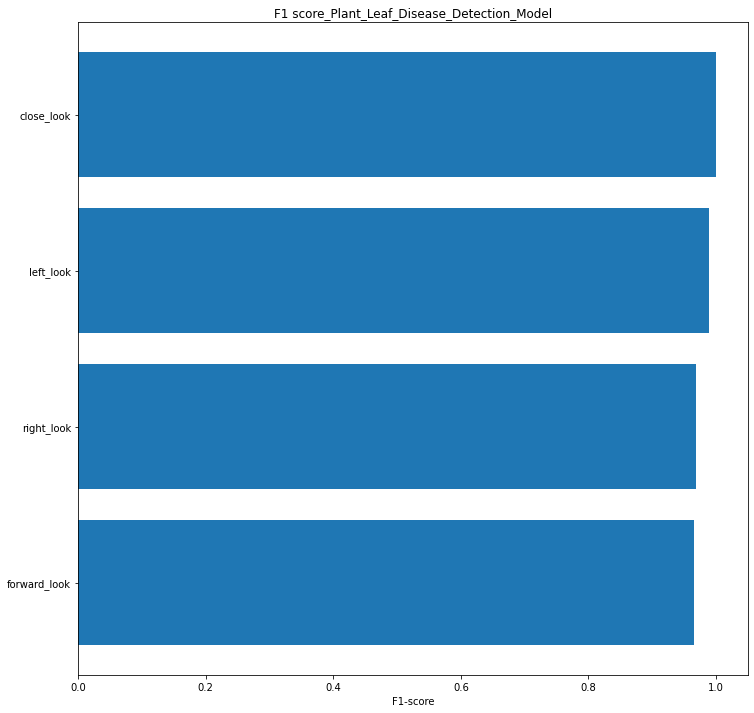

In [154]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values) # get f1-score value
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1 score_Plant_Leaf_Disease_Detection_Model")
ax.invert_yaxis(); # reverse the order of our plot


# Challenge: add value to the end of each bar of what the actual f1-score is 
# (hint: use the "autolabel" function from here: https://matplotlib.org/2.0.2/examples/api/barchart_demo.html) 

### **Visualize Predictions on Custom Images**

In [155]:
# Create a function to load and create a images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Read in an image from filename, turn it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename(str): path to target image
    image_shape(int): height/width dimension of target image size
    scale(bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
    image tensor of shape (img_shape, img_shape, 3)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3) 

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale Yes/no?
  if scale:
    # reshape the image (get all value between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale image for EffiecienNet model in TensorFlow   


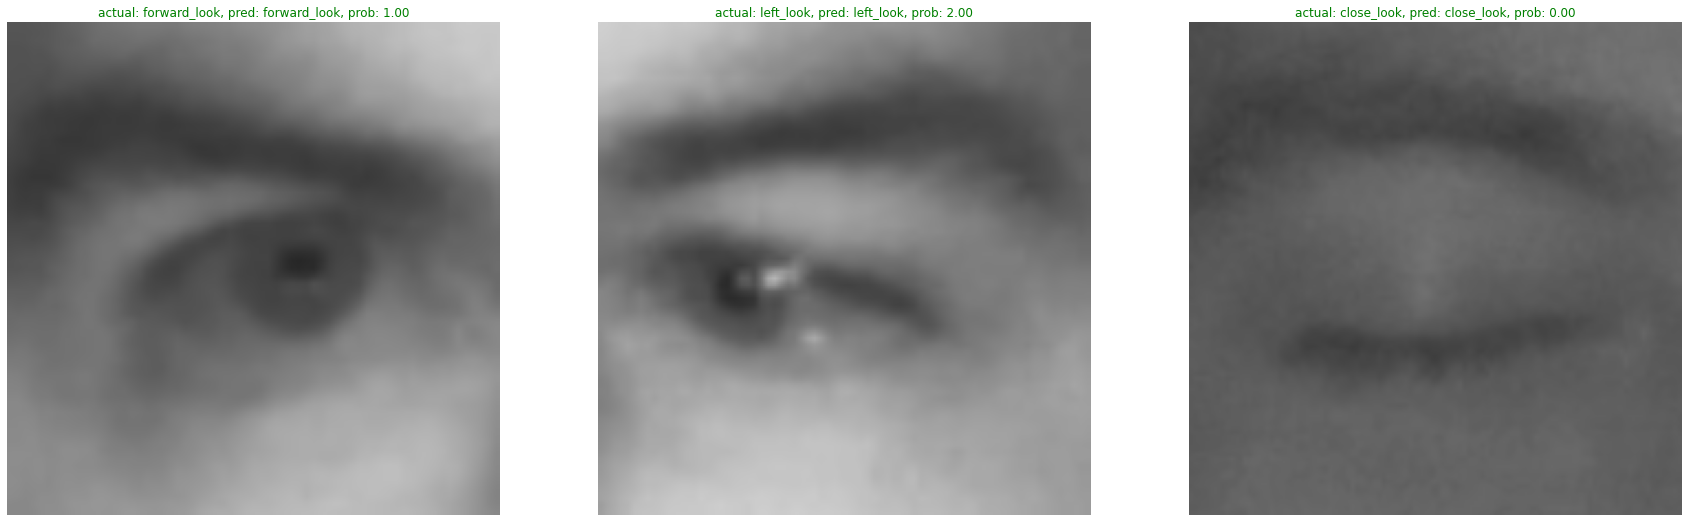

In [156]:
# Make preds on series of images
import os
import random

plt.figure(figsize=(30,30))
for i in range(3):
  # Choose a random image(s) from a random class(es)
  class_name =random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename


  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  # print(img.shape)
  img_expanded = tf.expand_dims(img, axis=0)
  # print(img_expanded.shape)
  pred_prob = model_5.predict(img_expanded) # get prediction probability array
  pred_class = class_names[pred_prob.argmax()] # get heighst prediction probability index and match it class_names list
  # print(pred_prob)
   # print(pred_class)

    # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # if predicted class matches truth class, make text green
    title_color = "g"
  else:
    title_color ="r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.argmax():.2f}", c=title_color)
  plt.axis(False);  

### **Test on Custom Image**

In [137]:
img = '/content/right-look.jpg'

(-0.5, 223.5, 223.5, -0.5)

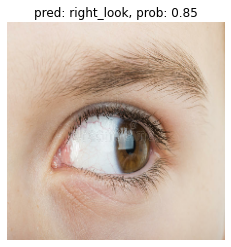

In [138]:
# Make prediction on and plot the custom food images

img = load_and_prep_image(img, scale=False) # don't need to do scale for our EfficienNetB0 model
pred_prob = model_5.predict(tf.expand_dims(img, axis=0)) # make prediction on the image with shape [1, 224,224, 1] (same shape as model trained on)
pred_class = class_names[pred_prob.argmax()] # get the index with heighest prediction probability
# plot the appropriate information
plt.figure()
plt.imshow(img/255.)
plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
plt.axis(False)